In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
city = pd.read_csv('city.csv')

Столбцы и количество строк в таблице city

In [4]:
city.columns

Index(['address', 'postal_code', 'country', 'federal_district', 'region_type',
       'region', 'area_type', 'area', 'city_type', 'city', 'settlement_type',
       'settlement', 'kladr_id', 'fias_id', 'fias_level', 'capital_marker',
       'okato', 'oktmo', 'tax_office', 'timezone', 'geo_lat', 'geo_lon',
       'population', 'foundation_year'],
      dtype='object')

In [5]:
len(city)

1117

Узнали самое длинное название города в таблице

In [128]:
q=[]
for i in city["city"]:
    i = str(i)
    q.append(i)
print(f'Самое длинное название города в таблице имеет {len(max(list, key=len))} символов')

Самое длинное название города в таблице имеет 25 символов


Количество городов для каждого часового пояса в Сибирском и Приволжском федеральных округах
Ответ: 58

In [130]:
time = city[city['federal_district'].isin(['Приволжский', 'Сибирский'])]
time[['timezone','address']].groupby('timezone').count().rename({'address': 'Количество городов'}, axis=1)

,Количество городов
timezone,
UTC+3,101
UTC+4,41
UTC+5,58
UTC+6,6
UTC+7,86
UTC+8,22


Количество городов в каждом часовом поясе, отсортированное по убыванию.

In [148]:
q = city[['timezone','address']].groupby('timezone').count().sort_values('address', ascending=False)
q.rename({'address': 'Количество городов'}, axis=1)


,Количество городов
timezone,
UTC+3,660
UTC+5,173
UTC+7,86
UTC+4,66
UTC+9,31
UTC+8,28
UTC+10,22
UTC+2,22
UTC+11,17


Индивидуальное задание

In [3]:
airports = pd.read_csv('airports.csv')
airports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68328,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad
68329,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN
68330,346788,ZZ-0003,small_airport,Fainting Goat Airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,no,87TX,NaN,87TX,NaN,NaN,NaN
68331,342102,ZZZW,closed,Scandium City Heliport,69.355287,-138.939310,4.0,NaN,CA,CA-YT,(Old) Scandium City,no,ZZZW,ZYW,YK96,NaN,NaN,NaN


Cделал поиск по некоторым из имён имеющимся в таблице

In [9]:
df1 = pd.DataFrame({'id' : [1, 2], 'name': ['Harry Potter', 'Ron Weasley']})
df2 = pd.DataFrame({'id' : [3], 'name': ['Hermione Granger']})
pd.concat([df1, df2]) .reset_index (drop=True)

,id,name
0,1,Harry Potter
1,2,Ron Weasley
2,3,Hermione Granger


In [12]:
airports.groupby(['iso_country', 'type']).size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000265AA85AF70>>

In [14]:
airports[airports.type.isin(['heliport', 'balloonport'])]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
9,322658,00CN,heliport,Kitchen Creek Helibase Heliport,32.727374,-116.459742,3350.0,NaN,US,US-CA,Pine Valley,no,00CN,NaN,00CN,NaN,NaN,NaN
12,6532,00FD,heliport,Ringhaver Heliport,28.846600,-82.345398,25.0,NaN,US,US-FL,Riverview,no,00FD,NaN,00FD,NaN,NaN,NaN
15,6535,00GE,heliport,Caffrey Heliport,33.889245,-84.737930,957.0,NaN,US,US-GA,Hiram,no,00GE,NaN,00GE,NaN,NaN,NaN
16,6536,00HI,heliport,Kaupulehu Heliport,19.832715,-155.980233,43.0,NaN,US,US-HI,Kailua-Kona,no,00HI,NaN,00HI,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67976,347768,ZA-0251,heliport,Eagle View Helipad,-25.390456,30.172134,NaN,AF,ZA,ZA-MP,Walkersons,no,NaN,NaN,FAEV,NaN,NaN,"Eagle, view, Cabin, helipad"
68029,339169,ZGNT,heliport,Shenzhen Nantou Heliport,22.558736,113.925612,NaN,AS,CN,CN-44,Shenzhen (Nanshan),no,ZGNT,NaN,NaN,NaN,NaN,NaN
68054,301278,ZIZ,heliport,Zamzama Heliport,26.710944,67.667250,128.0,AS,PK,PK-SD,Zamzama Gas Field,no,NaN,ZIZ,NaN,NaN,NaN,NaN
68277,345912,ZW-0048,heliport,Chinyike Mine Heliport,-18.925900,30.274200,NaN,AF,ZW,ZW-U-A,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
airports[(airports.iso_region == 'US-CA') & (airports.type == 'large_airport')][['ident','name', 'municipality']]

,ident,name,municipality
32088,KACV,California Redwood Coast-Humboldt County Inter...,Arcata/Eureka
32238,KBAB,Beale Air Force Base,Marysville
32491,KCMA,Camarillo International Airport,Camarillo
33084,KEDW,Edwards Air Force Base,Edwards
33859,KL45,Bakersfield International Airport,Bakersfield
33883,KLAX,Los Angeles International Airport,Los Angeles
34412,KOAK,Metropolitan Oakland International Airport,Oakland
34468,KONT,Ontario International Airport,Ontario
35998,KSAN,San Diego International Airport,San Diego
36038,KSFO,San Francisco International Airport,San Francisco


In [ ]:
Из каких аэропортов и на высоте летали самолёты,измеренной в фунтах

Text(0.5, 1.0, 'Из каких аэропортов и на высоте летали самолёты,измеренной в фунтах')

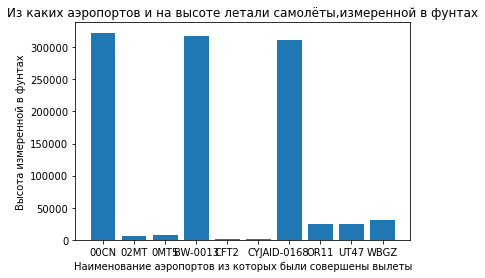

In [36]:
q_1 = airports[airports['elevation_ft'] == 3350.0]
q_2 = q_1[q_1['elevation_ft'] == 3350.0]
x = q_2['ident']
y = q_2['id']
plt.bar(x, y)
plt.xlabel("Наименование аэропортов из которых были совершены вылеты")
plt.ylabel("Высота измеренной в фунтах")
plt.title("Из каких аэропортов и на высоте летали самолёты,измеренной в фунтах")